# Ensembling with different number of models
Before ensembling our models, we like to test it out on CoLA dataset to see the score change with the number of models increasing.  
We will comapre the score between single models with ensembling models(up to 6 models).


In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We make predictions of CoLA's dev set with 2 electras, 1 xlnet, and 3 berts, total 6 models and add the lable of CoLA's dev set.

From Running Trainer.py, we get the score of each model as following:


1.   electra-1 : 0.6774
2.   electra-2 : 0.6631
3.   bert-3 : 0.5981
4.   bert-1 : 0.5955
5.   bert-2 : 0.5754
6.   xlnet : 0.4676

We are going to start from ensamble all 6 models then drop one with the lowest score still a single model.



In [ ]:
# Get the absolute path of the current folder
import pandas as pd

abspath_curr = '/content/drive/My Drive/NLP_Final_Exam/'
df = pd.read_excel(abspath_curr + 'cola.xlsx',header=0)

df.head()

,electra-0,electra-1,electra2-0,electra2-1,xlnet-0,xlnet-1,bert-0,bert-1,bert2-0,bert2-1,bert3-0,bert3-1,target
0,-3.015364,2.818316,-2.163078,2.018426,-2.792709,3.361839,-2.782302,3.292792,-2.141454,1.960070,-2.280861,2.351163,1
1,-3.272816,3.013487,-2.871374,2.883802,-3.019989,3.219829,-2.536592,3.144536,-2.195974,1.860165,-2.379374,2.406841,1
2,-2.484975,2.380282,-2.376473,2.256080,-1.700235,1.687799,-2.348618,2.650339,-2.242263,1.838615,-2.820595,2.764201,1
3,-3.138503,2.965038,-2.718466,2.658213,-2.994277,3.023010,-2.814234,3.324904,-2.432509,1.973530,-2.748433,2.449374,1
4,-2.365048,2.197786,-0.875185,0.664087,-2.657328,2.292092,2.783062,-3.252907,0.454222,-0.853928,1.091676,-0.697155,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.20,random_state=20000) 
model = LogisticRegression(solver='liblinear', random_state=20000).fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        65
           1       0.88      0.97      0.92       144

    accuracy                           0.89       209
   macro avg       0.90      0.83      0.86       209
weighted avg       0.89      0.89      0.88       209



In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc_6 = matthews_corrcoef(pred,y_test)
print(mcc_6)

0.7260966431901814


In [ ]:
df.drop('xlnet-0',axis=1,inplace=True)
df.drop('xlnet-1',axis=1,inplace=True)
df.head()

,electra-0,electra-1,electra2-0,electra2-1,bert-0,bert-1,bert2-0,bert2-1,bert3-0,bert3-1,target
0,-3.015364,2.818316,-2.163078,2.018426,-2.782302,3.292792,-2.141454,1.960070,-2.280861,2.351163,1
1,-3.272816,3.013487,-2.871374,2.883802,-2.536592,3.144536,-2.195974,1.860165,-2.379374,2.406841,1
2,-2.484975,2.380282,-2.376473,2.256080,-2.348618,2.650339,-2.242263,1.838615,-2.820595,2.764201,1
3,-3.138503,2.965038,-2.718466,2.658213,-2.814234,3.324904,-2.432509,1.973530,-2.748433,2.449374,1
4,-2.365048,2.197786,-0.875185,0.664087,2.783062,-3.252907,0.454222,-0.853928,1.091676,-0.697155,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.20,random_state=20000) 
model = LogisticRegression(solver='liblinear', random_state=20000).fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        65
           1       0.88      0.97      0.92       144

    accuracy                           0.89       209
   macro avg       0.90      0.83      0.86       209
weighted avg       0.89      0.89      0.88       209



In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc_5 = matthews_corrcoef(pred,y_test)
print(mcc_5)

0.7260966431901814


In [ ]:
df.drop('bert2-0',axis=1,inplace=True)
df.drop('bert2-1',axis=1,inplace=True)
df.head()

,electra-0,electra-1,electra2-0,electra2-1,bert-0,bert-1,bert3-0,bert3-1,target
0,-3.015364,2.818316,-2.163078,2.018426,-2.782302,3.292792,-2.280861,2.351163,1
1,-3.272816,3.013487,-2.871374,2.883802,-2.536592,3.144536,-2.379374,2.406841,1
2,-2.484975,2.380282,-2.376473,2.256080,-2.348618,2.650339,-2.820595,2.764201,1
3,-3.138503,2.965038,-2.718466,2.658213,-2.814234,3.324904,-2.748433,2.449374,1
4,-2.365048,2.197786,-0.875185,0.664087,2.783062,-3.252907,1.091676,-0.697155,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.20,random_state=20000) 
model = LogisticRegression(solver='liblinear', random_state=20000).fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77        65
           1       0.86      0.97      0.92       144

    accuracy                           0.88       209
   macro avg       0.89      0.82      0.84       209
weighted avg       0.88      0.88      0.87       209



In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc_4 = matthews_corrcoef(pred,y_test)
print(mcc_4)

0.7026786880187801


In [ ]:
df.drop('bert-0',axis=1,inplace=True)
df.drop('bert-1',axis=1,inplace=True)
df.head()

,electra-0,electra-1,electra2-0,electra2-1,bert3-0,bert3-1,target
0,-3.015364,2.818316,-2.163078,2.018426,-2.280861,2.351163,1
1,-3.272816,3.013487,-2.871374,2.883802,-2.379374,2.406841,1
2,-2.484975,2.380282,-2.376473,2.256080,-2.820595,2.764201,1
3,-3.138503,2.965038,-2.718466,2.658213,-2.748433,2.449374,1
4,-2.365048,2.197786,-0.875185,0.664087,1.091676,-0.697155,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.20,random_state=20000) 
model = LogisticRegression(solver='liblinear', random_state=20000).fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78        65
           1       0.87      0.97      0.92       144

    accuracy                           0.88       209
   macro avg       0.89      0.82      0.85       209
weighted avg       0.88      0.88      0.87       209



In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc_3 = matthews_corrcoef(pred,y_test)
print(mcc_3)

0.7144079587843236


In [ ]:
df.drop('bert3-0',axis=1,inplace=True)
df.drop('bert3-1',axis=1,inplace=True)
df.head()

,electra-0,electra-1,electra2-0,electra2-1,target
0,-3.015364,2.818316,-2.163078,2.018426,1
1,-3.272816,3.013487,-2.871374,2.883802,1
2,-2.484975,2.380282,-2.376473,2.256080,1
3,-3.138503,2.965038,-2.718466,2.658213,1
4,-2.365048,2.197786,-0.875185,0.664087,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.20,random_state=20000) 
model = LogisticRegression(solver='liblinear', random_state=20000).fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77        65
           1       0.86      0.97      0.92       144

    accuracy                           0.88       209
   macro avg       0.89      0.82      0.84       209
weighted avg       0.88      0.88      0.87       209



In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc_2 = matthews_corrcoef(pred,y_test)
print(mcc_2)

0.7026786880187801


In [ ]:
df.drop('electra2-0',axis=1,inplace=True)
df.drop('electra2-1',axis=1,inplace=True)
df.head()

,electra-0,electra-1,target
0,-3.015364,2.818316,1
1,-3.272816,3.013487,1
2,-2.484975,2.380282,1
3,-3.138503,2.965038,1
4,-2.365048,2.197786,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.20,random_state=20000) 
model = LogisticRegression(solver='liblinear', random_state=20000).fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76        65
           1       0.86      0.97      0.91       144

    accuracy                           0.87       209
   macro avg       0.88      0.81      0.84       209
weighted avg       0.87      0.87      0.86       209



In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc_1 = matthews_corrcoef(pred,y_test)
print(mcc_1)

0.6898340181348958


In [ ]:
mcc_score = pd.DataFrame({'number_of_models': [1,2,3,4,5,6] ,
                         'mcc_scores': [mcc_1,mcc_2,mcc_3,mcc_4,mcc_5,mcc_6]})
print(mcc_score)

   number_of_models  mcc_scores
0                 1    0.689834
1                 2    0.702679
2                 3    0.714408
3                 4    0.702679
4                 5    0.726097
5                 6    0.726097


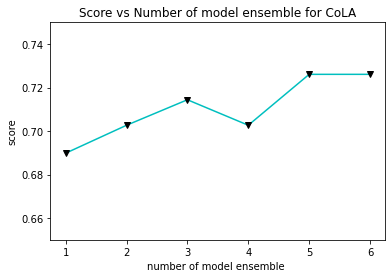

In [ ]:
from matplotlib import pyplot as plt
plt.plot(mcc_score.number_of_models, mcc_score.mcc_scores,"-", color="c")
plt.plot(mcc_score.number_of_models, mcc_score.mcc_scores,".",marker="v",color="k")
plt.ylim(0.65, 0.75)
plt.ylabel("score")
plt.xlabel("number of model ensemble ")
plt.title("Score vs Number of model ensemble for CoLA")
# plt.xscale('log')
# ax.set_yscale('log')
plt.show()